Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Читаем наш датасет

In [2]:
df_spoti = pd.read_csv('songs_normalize.csv')
df_spoti.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Обобщенно посмотрим на данные

In [3]:
df_spoti.shape
df_spoti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Проверим датасет на пропуски

In [4]:
df_spoti.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

Нам повезло, и пропусков нет! Посмотрим какие артисты чаще всего упомитаются в чартах спотифай

In [5]:
most_popular_artists = df_spoti['artist'].value_counts()
most_popular_artists

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

Построим график топ-20 самых упоминаемых в чартах артистов

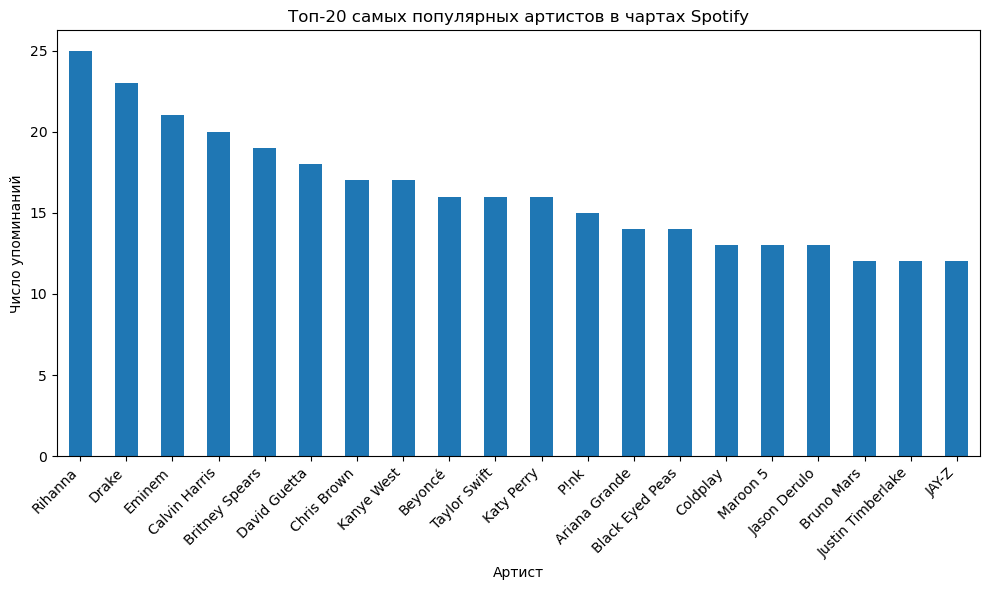

In [6]:
plt.figure(figsize=(10, 6))
most_popular_artists.head(20).plot(kind='bar')
plt.title('Топ-20 самых популярных артистов в чартах Spotify')
plt.xlabel('Артист')
plt.ylabel('Число упоминаний')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Теперь посмотрим на то, сколько хитов попадало в чарты Spotify каждый год и построим по этим данным график

In [7]:
songs_in_time = df_spoti['year'].value_counts().sort_index()
songs_in_time

1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: year, dtype: int64

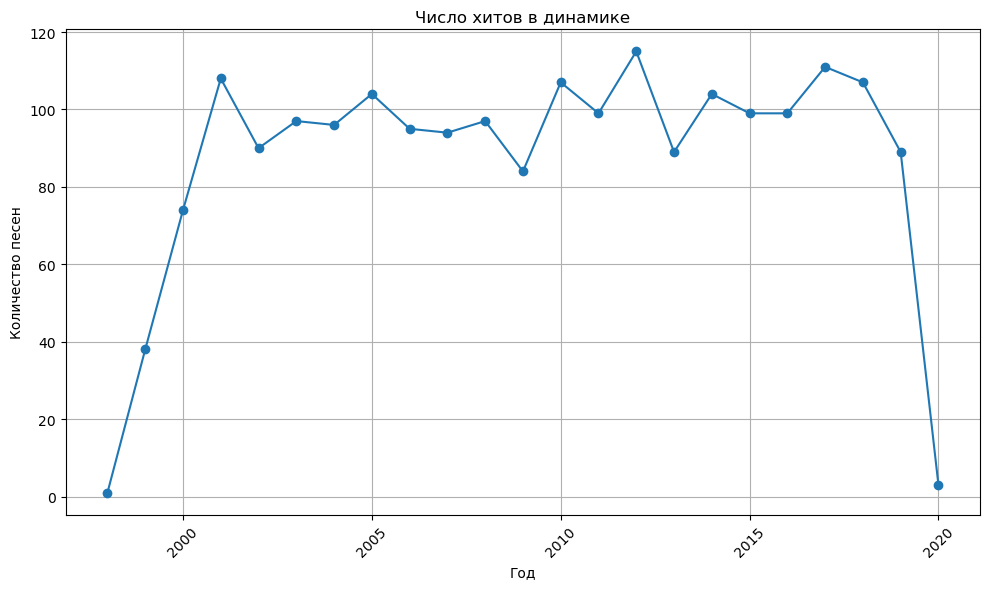

In [8]:
plt.figure(figsize=(10, 6))
songs_in_time.plot(marker='o', linestyle='-')
plt.title('Число хитов в динамике')
plt.xlabel('Год')
plt.ylabel('Количество песен')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Можно заметить, что число хитов исторически держится на уровне примерно 80-120, за 2020 год на момент создания датасета не было получено достаочно данных за целый год. Можно предположить, что есть ограничение, сколько треков может быть в чарте Spotify.

Для удобства переведем продолжительность песен из миллисекунд в минуты, и посмотрим, как менялась продолжительность треков, построим график

In [9]:
df_spoti['duration_min'] = df_spoti['duration_ms'] / (1000 * 60)
average_duration_by_year = df_spoti.groupby('year')['duration_min'].mean()
average_duration_by_year

year
1998    3.591100
1999    4.223077
2000    4.166551
2001    4.040834
2002    4.225818
2003    3.938911
2004    3.900664
2005    3.941905
2006    3.969140
2007    3.862498
2008    3.927921
2009    3.934701
2010    3.680079
2011    3.812327
2012    3.734084
2013    3.844357
2014    3.676300
2015    3.639677
2016    3.667004
2017    3.538786
2018    3.492580
2019    3.278813
2020    3.623261
Name: duration_min, dtype: float64

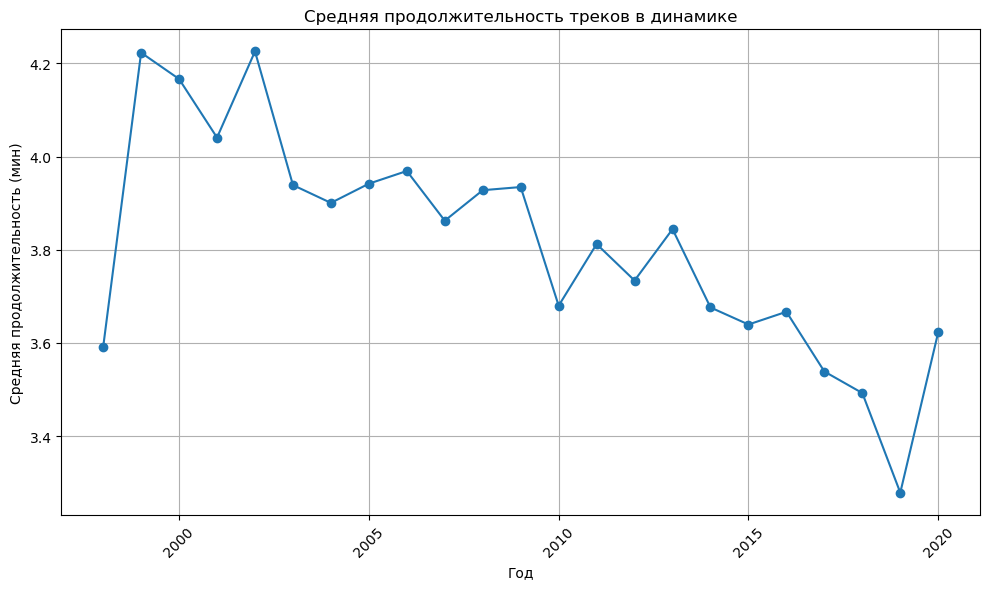

In [10]:
plt.figure(figsize=(10, 6))
average_duration_by_year.plot(marker='o', linestyle='-')
plt.title('Средняя продолжительность треков в динамике')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (мин)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Как можно заметить, продолжительность хитов так или иначе снижается с годами. Вероятно, на это повлияла снижающаяся продолжительность концентрации внимания современной аудитории.

Создание новых признаков. Наш проект включает в себя рассмотрение таких факторов, как энергия (energy), темпа (temp), громкости (loudness). Данные элементы можно объединить в один признак - оценка драйва (drive) трека, что оказывает большое влияние на восприятие песни аудиторией и его положение в топе Spotify.

Для создания нового признака мы совершим следующие шаги:

1. Для начала мы стандартизируем показатели энергии (energy), темпа (tempo) и громкости (loudness), что позволит нам получить наилучший результат.
2. Для рассчета драйва (drive) мы применяем метод PCA для создания нового признака.

In [14]:
features = ['energy', 'tempo', 'loudness']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_spoti[features])

pca = PCA(n_components=1)
df_spoti['drive'] = pca.fit_transform(scaled_features)
df_spoti.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,drive
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333,-0.322881
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433,-1.260170
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4.175767,2.105494
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550,-1.384805
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667,-1.648119


Предлагаю создать признак вовлеченность (engagement), который будет оценивает вовлеченность слушателей на основании нескольких метрик, таких как разборчивость (speechiness), акустичность (acoustics), живость (liveness), мера музыкальной позитивности (valence), танцевальность (danceability). Этот признак может помочь оценить, насколько хорошо песня взаимодействует с аудиторией, что может оказывать влияние на колличество прослушиваний и популярность песен.

Для создания нового признака мы совершим следующие шаги:

1. Для начала мы стандартизируем показатели разборчивость (speechiness), акустичность (acoustics), живость (liveness), мера музыкальной позитивности (valence), танцевальность (danceability)
2. Создаем объект PCA
3. Применяем PCA к выбранным признакам с помощью метода fit_transform(), который одновременно обучает модель PCA и преобразует данные.

In [15]:
features2 = ['speechiness', 'acousticness', 'liveness', 'valence', 'danceability']

scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(df_spoti[features2])

pca = PCA(n_components=1)
df_spoti['engagement'] = pca.fit_transform(scaled_features2)
df_spoti.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,drive,engagement
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333,-0.322881,-0.909733
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433,-1.260170,0.876223
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4.175767,2.105494,1.764769
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550,-1.384805,0.660604
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667,-1.648119,-0.714267


Одна из переменных, которую мы далее будем анализировать - популярность. Построим графики распределения песен по популярности, взаимосвязи танцевальности, энергичности, громкости, акустичности, драйва и популярности, а также популярности по годам и топ-10 жанров

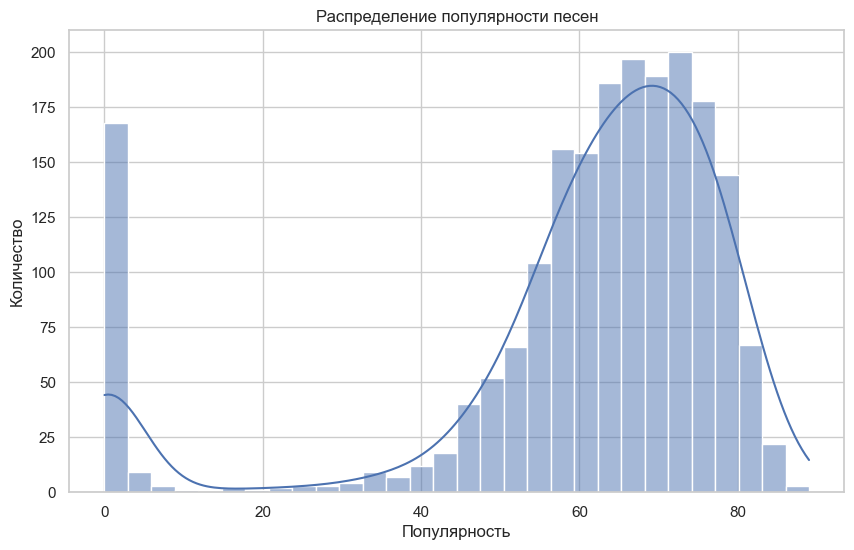

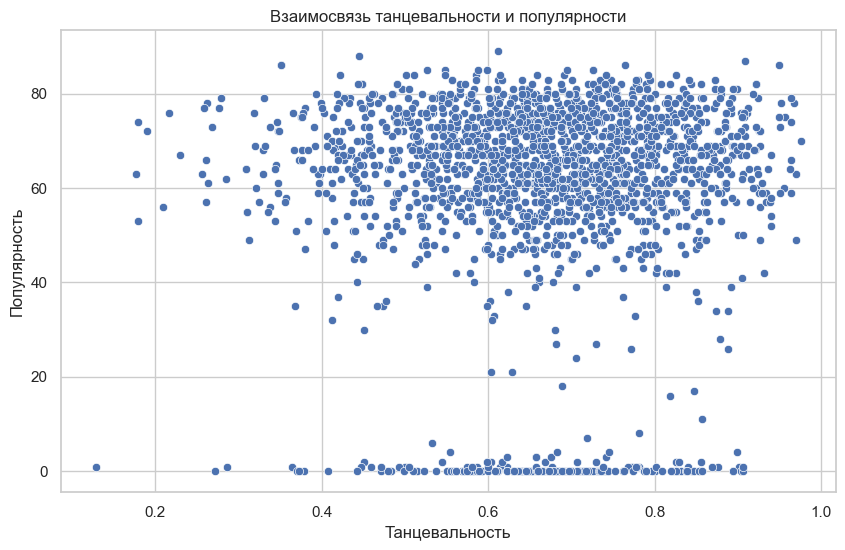

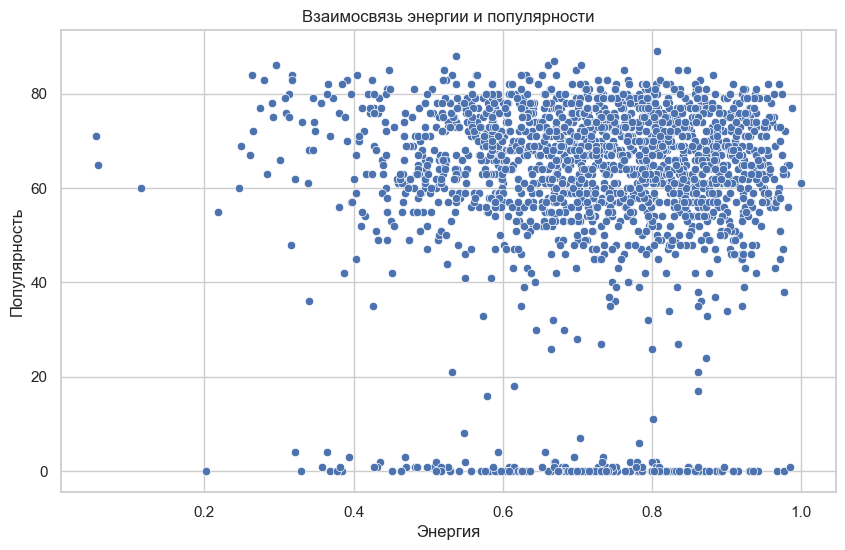

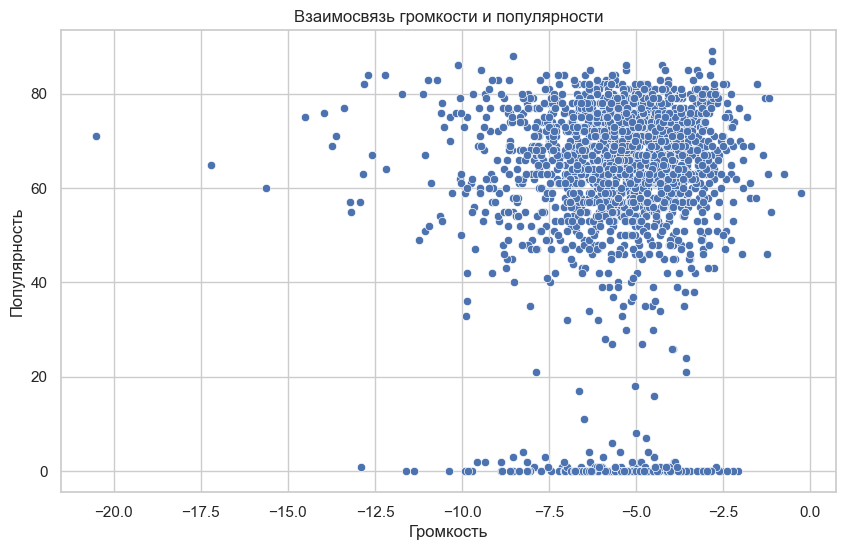

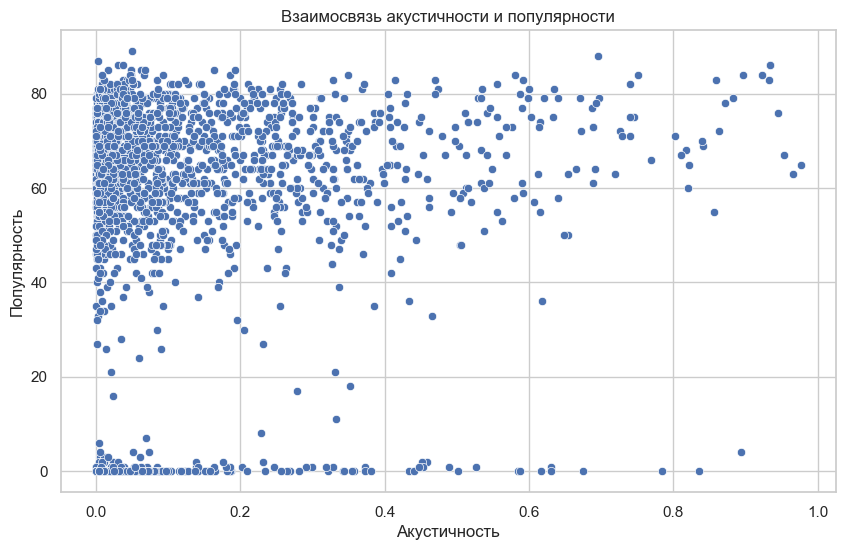

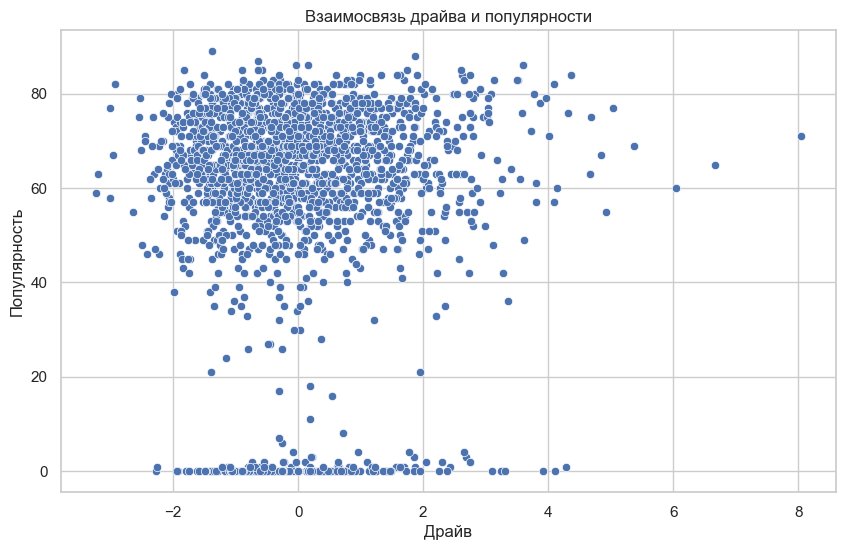

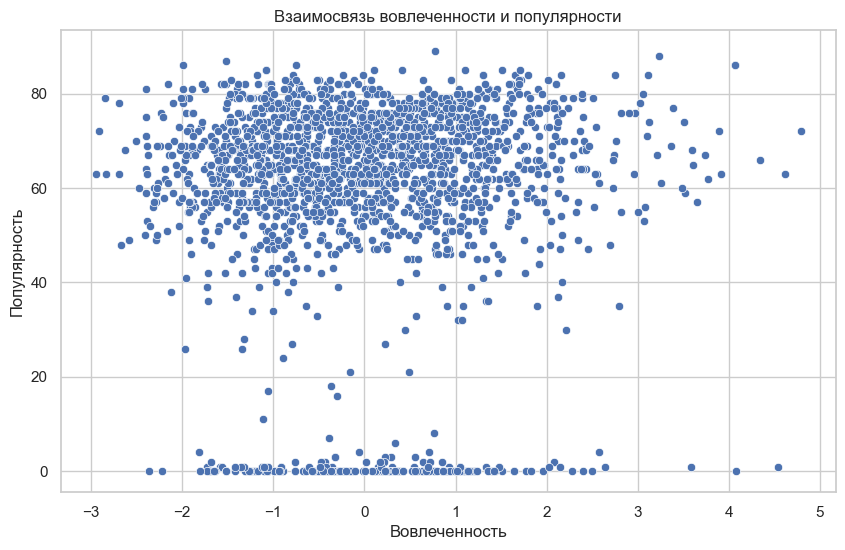

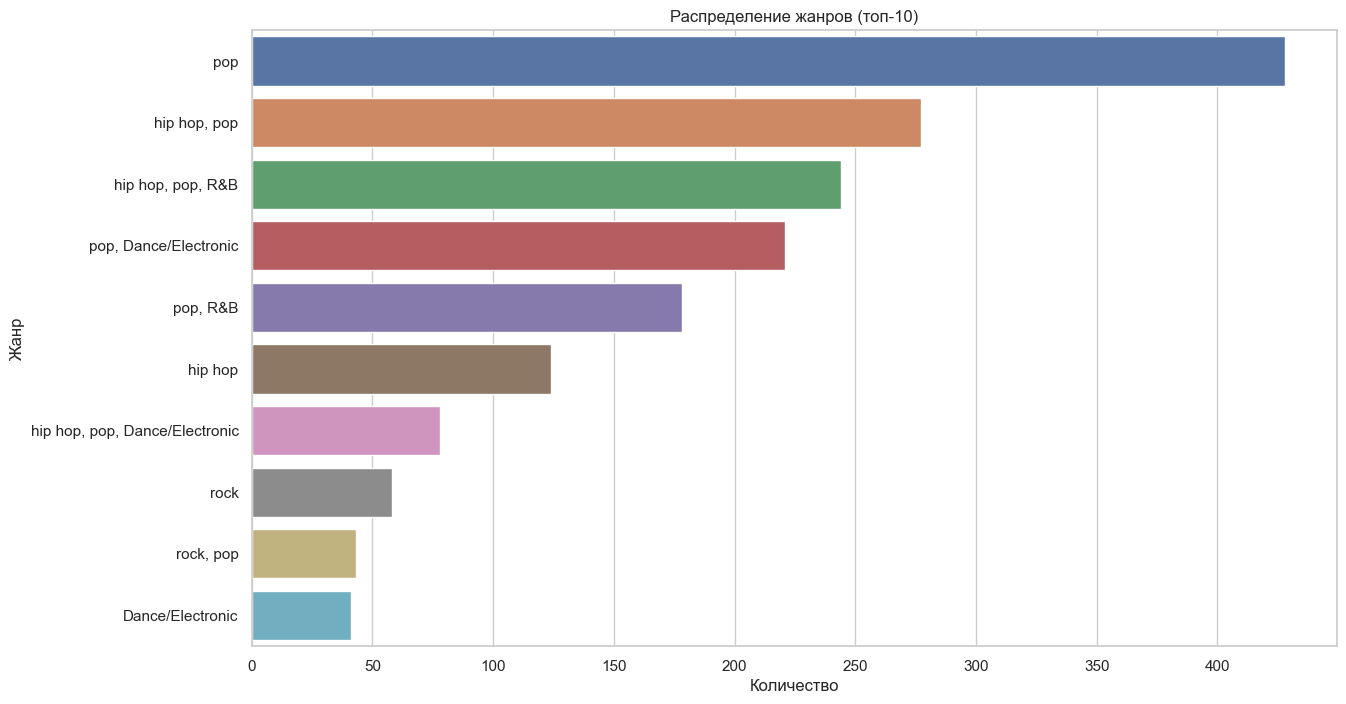

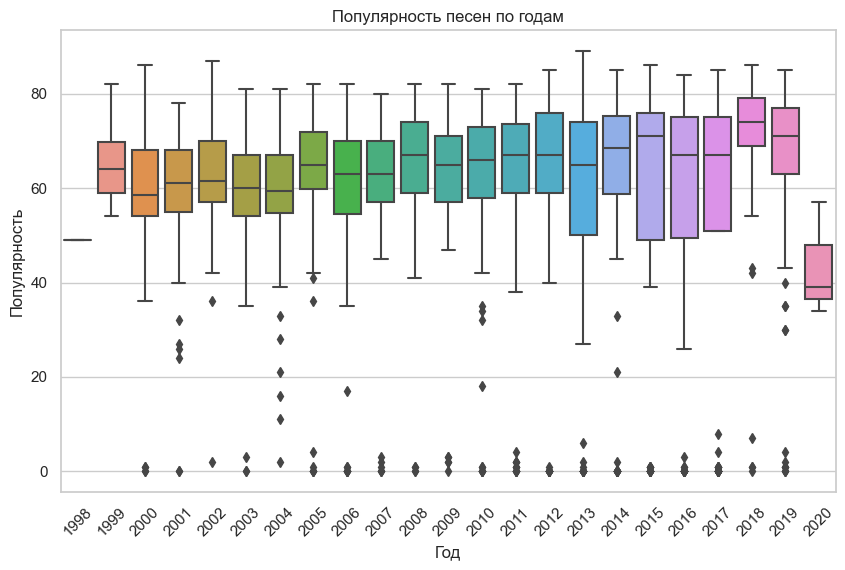

In [16]:
sns.set(style="whitegrid")

# Выборка для визуализаций
eda_data = df_spoti.copy()

def create_plots(df_spoti):
    # Распределение популярности
    plt.figure(figsize=(10, 6))
    sns.histplot(df_spoti['popularity'], bins=30, kde=True)
    plt.title('Распределение популярности песен')
    plt.xlabel('Популярность')
    plt.ylabel('Количество')
    plt.show()

    # Взаимосвязь танцевальности и популярности
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='danceability', y='popularity', data=df_spoti)
    plt.title('Взаимосвязь танцевальности и популярности')
    plt.xlabel('Танцевальность')
    plt.ylabel('Популярность')
    plt.show()

    # Взаимосвязь энергии и популярности
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='energy', y='popularity', data=df_spoti)
    plt.title('Взаимосвязь энергии и популярности')
    plt.xlabel('Энергия')
    plt.ylabel('Популярность')
    plt.show()

    # Взаимосвязь громкости и популярности
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='loudness', y='popularity', data=df_spoti)
    plt.title('Взаимосвязь громкости и популярности')
    plt.xlabel('Громкость')
    plt.ylabel('Популярность')
    plt.show()

    # Взаимосвязь акустичности и популярности
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='acousticness', y='popularity', data=df_spoti)
    plt.title('Взаимосвязь акустичности и популярности')
    plt.xlabel('Акустичность')
    plt.ylabel('Популярность')
    plt.show()

    # Взаимосвязь "drive" и популярности
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='drive', y='popularity', data=df_spoti)
    plt.title('Взаимосвязь драйва и популярности')
    plt.xlabel('Драйв')
    plt.ylabel('Популярность')
    plt.show()
    
    # Взаимосвязь "engagement" и популярности
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='engagement', y='popularity', data=df_spoti)
    plt.title('Взаимосвязь вовлеченности и популярности')
    plt.xlabel('Вовлеченность')
    plt.ylabel('Популярность')
    plt.show()

    # Распределение жанров
    plt.figure(figsize=(14, 8))
    genre_counts = df_spoti['genre'].value_counts().head(10)
    sns.barplot(x=genre_counts.values, y=genre_counts.index)
    plt.title('Распределение жанров (топ-10)')
    plt.xlabel('Количество')
    plt.ylabel('Жанр')
    plt.show()

    # Популярность по годам
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='popularity', data=df_spoti)
    plt.title('Популярность песен по годам')
    plt.xlabel('Год')
    plt.ylabel('Популярность')
    plt.xticks(rotation=45)
    plt.show()

create_plots(eda_data)


Распределение песен по популярности имеет вид бимодального, есть сдвиг вправо и выбросы слева. Эти выбросы составляют массу треков, которые не популярны, однако попадают в чарты.

Графики взаимосвязи танцевальности, энергичности и популярности очень схожи между собой: одно облако рассеивания, однако выбросы имеют место. Можно сделать вывод, что основная масса танцевальных и энергичных песен популярны, а большое количество выбросов со значением показателя популярности "0", наоборот, совершенно не популярны, хотя имеют высокие показатели танцевальности и энергии.

График взаимосвязи громкости и популярности показывает практически то же облако рассеивания, что два предыдущих графика, но при других значениях на оси абсцисс. Можно также сделать вывод, что основная масса громких треков популярны, а большое количество выбросов со значением показателя популярности "0", наоборот, совершенно не популярны, хотя имеют высокие показатели громкости.

График взаимосвязи акустичности и популярности показывает, что в основном популярны треки с акустичностью, близкой к 0, однако есть большое количество выбросов, что не позволяет сделать однозначные выводы.

График взаимосвязи драйва и популярности также похож на прошлые, имеет большое скопление выбросов на уровне популярности 0 и при сравнительно высоко драйве, однако главное облако показывает, что "драйвовые" треки также популярны, в основном.

График взаимосвязи вовлеченности и популярности похож на предыдущий график, имеет большое скопление выбросов на уровне 0, мы видим достаточно большой разброс данных, показывающих на некую "неопределенность" в заимосвязи двух признаков, так как и при отрицательной вовлеченности и при положительной треки могут иметь довольно большие показатели популярности.

На графике распределения популярности жанров музыки видно, что самый популярный - это pop, за ним идут hip hop, R&B и Dance/Electronic. На это влияют только вкусы слушателей и вирусность трека.

На графике распределения популярности песен по годам видно, что в средем тренд держится на уровне популярности >60. Это тоже могло бы быть ограничение для попадания в чарт, но так как есть значительное количество выбросов с популярностью меньше, это не так.